Exercitiul 1

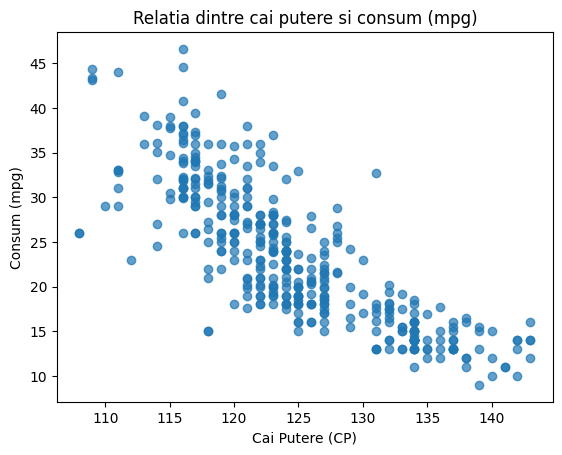

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('auto-mpg.csv')

#iau col de care am nevoie
data = data[['horsepower', 'mpg']].dropna()    #elimin randurile care contin valori lipsa/NaN, cum e undeva ? la horsepower
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')  #in csv val sunt ca string-uri; unde gasesc ceva de genul ?, convertesc la NaN si nu ma uit
#practic ma asigur ca lucrez cu nr valide
#curat iar daca s-a mai convertit ceva la NaN
data = data.dropna()

plt.scatter(data['horsepower'], data['mpg'], alpha=0.7)
plt.title('Relatia dintre cai putere si consum (mpg)')
plt.xlabel('Cai Putere (CP)')
plt.ylabel('Consum (mpg)')
plt.show()


In [2]:
import pymc as pm
import numpy as np

X = data['horsepower'].values
Y = data['mpg'].values

with pm.Model() as model:

    #distr normala->> clopot; simetrica in jurul mediei
    #dev standard->> cat de imprastiate sunt val in jurul mediei
    #ex: inaltimea oamenilor, primul lab

    #ecuatie de regresie->>imi arata cum var indep de la inceput afecteaza var rezultat, adica cea dep
    #y=beta0 + beta1*x + epsilon

    #beta0=val lui y cand x=0, de aici incep linia de regresie

    #beta1=panta, adica modif asteptata in y pt o unitate de crestere in x

    #epsilon=zgomotul/eroarea, variatia in y care nu e explicata de model


    intercept = pm.Normal("Intercept", mu=0, sigma=10)   #media, dev standard ->fac o pp generala la inceput
    slope = pm.Normal("Slope", mu=0, sigma=10)   #panta
    sigma = pm.HalfNormal("Sigma", sigma=10)   #eroarea/zgomot

    mu = intercept + slope * X  #media distr asteptate pt y

    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

    trace = pm.sample(2000, return_inferencedata=True)


Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━  94% 0:00:02 / 0:00:30

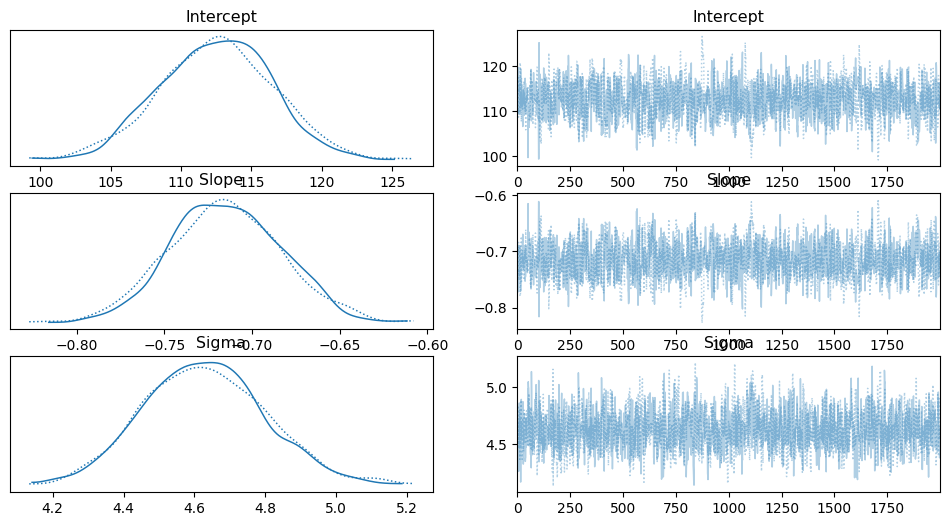

Intercept: 112.48102932399158, Slope: -0.7148225314857671


In [3]:
import arviz as az

az.plot_trace(trace, var_names=["Intercept", "Slope", "Sigma"])
plt.show()

#varful cel mai inalt->acea valoare e cea mai probabila pentru intercept
#val din jurul lui 110 sunt cele mai probabile

intercept_mean = trace.posterior["Intercept"].mean().item()
slope_mean = trace.posterior["Slope"].mean().item()
print(f"Intercept: {intercept_mean}, Slope: {slope_mean}")


TypeError: Dimension mismatch for x: (100,) and hdi: (2,). Check the dimensions of y andhdi_kwargs to make sure they are compatible

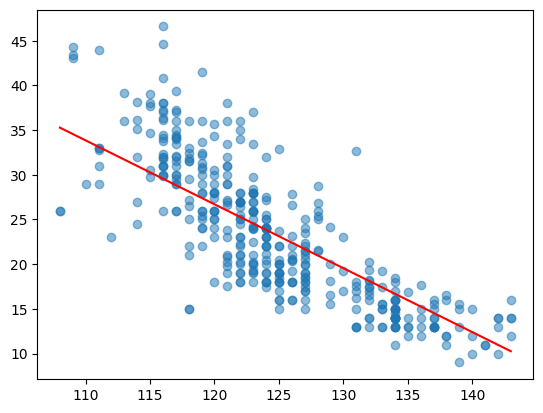

In [4]:
x_range = np.linspace(X.min(), X.max(), 100)
y_pred = intercept_mean + slope_mean * x_range

plt.scatter(data['horsepower'], data['mpg'], alpha=0.5, label='Date')
plt.plot(x_range, y_pred, color='red', label='Linia de regresie')
az.plot_hdi(x_range, intercept_mean + slope_mean * x_range, hdi_prob=0.95, ax=plt.gca())
plt.xlabel('Cai Putere (CP)')
plt.ylabel('Consum (mpg)')
plt.legend()
plt.title('Regresie Liniara cu HDI')
plt.show()


Exercitiul 2

Output()

Sampling chain 0, 0 divergences ━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━  39% 0:00:05 / 0:00:03

Output()

Sampling chain 1, 0 divergences ━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━  37% 0:00:05 / 0:00:03

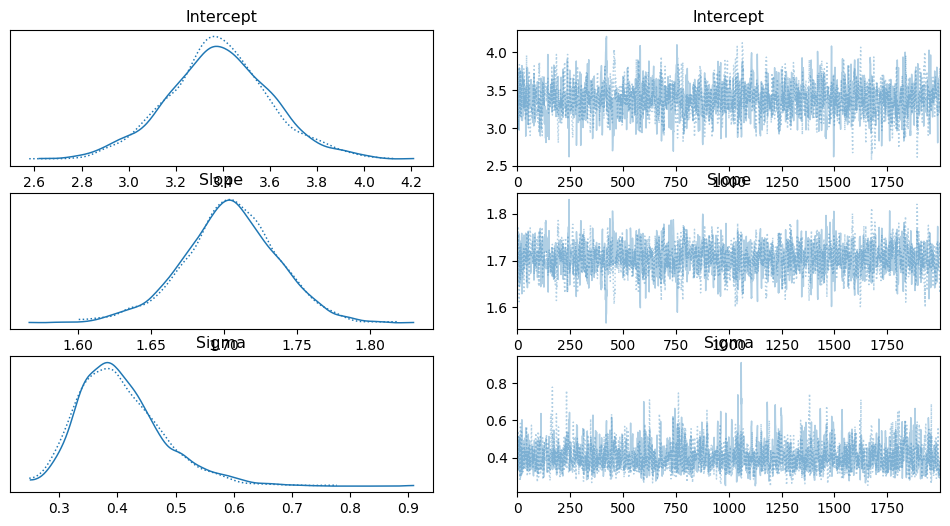

Intercept: 3.3843864235825185, Slope: 1.7042274778676028


In [5]:

publicitate = [1.5, 2.0, 2.3, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]
vanzare = [5.2, 6.8, 7.5, 8.0, 9.0, 10.2, 11.5, 12.0, 13.5, 14.0, 15.0, 15.5, 16.2, 17.0, 18.0, 18.5, 19.5, 20.0, 21.0, 22.0]

X = np.array(publicitate)
Y = np.array(vanzare)

with pm.Model() as model2:
    intercept = pm.Normal("Intercept", mu=0, sigma=10)
    slope = pm.Normal("Slope", mu=0, sigma=10)
    sigma = pm.HalfNormal("Sigma", sigma=10)

    mu = intercept + slope * X

    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

    trace2 = pm.sample(2000, return_inferencedata=True)

az.plot_trace(trace2, var_names=["Intercept", "Slope", "Sigma"])
plt.show()

intercept2_mean = trace2.posterior["Intercept"].mean().item()
slope2_mean = trace2.posterior["Slope"].mean().item()
print(f"Intercept: {intercept2_mean}, Slope: {slope2_mean}")


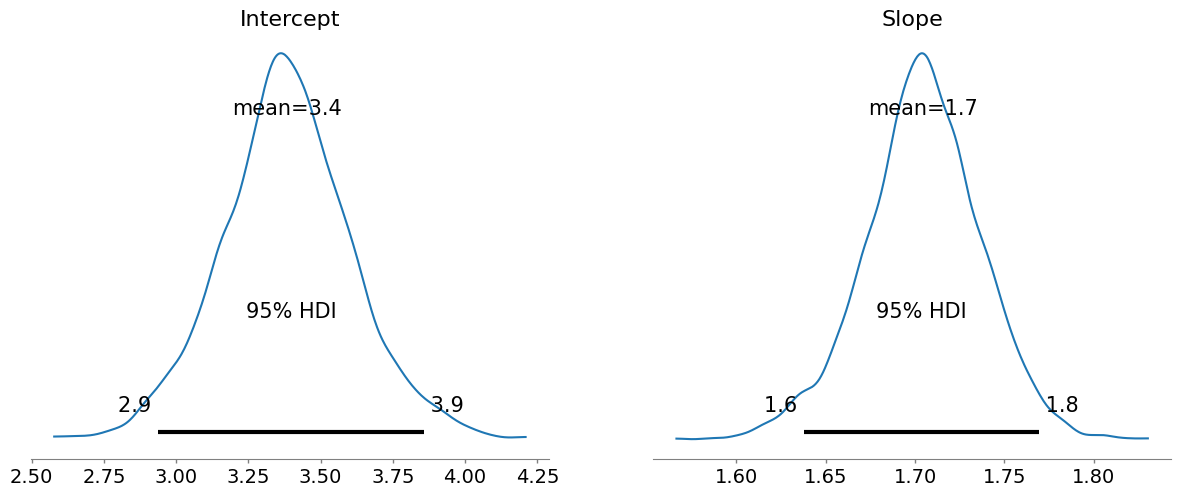

In [6]:
az.plot_posterior(trace2, var_names=["Intercept", "Slope"], hdi_prob=0.95)
plt.show()


In [8]:

noi_cheltuieli = [12, 13, 14]
noi_predicții = [intercept2_mean + slope2_mean * x for x in noi_cheltuieli]
print(f"Predictii pentru noi cheltuieli: {noi_predicții}")


Predictii pentru noi cheltuieli: [23.835116157993752, 25.539343635861357, 27.243571113728958]
